## California housing dataset

In [1]:
#Name - Aditya Kumar
#Email - ak10.nit.100@gmail.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
df = pd.DataFrame(np.array(data.data),columns=data.feature_names)

In [79]:
#df.head()

In [7]:
df['median_house_value'] = data.target

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc                20640 non-null float64
HouseAge              20640 non-null float64
AveRooms              20640 non-null float64
AveBedrms             20640 non-null float64
Population            20640 non-null float64
AveOccup              20640 non-null float64
Latitude              20640 non-null float64
Longitude             20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Some visualizations

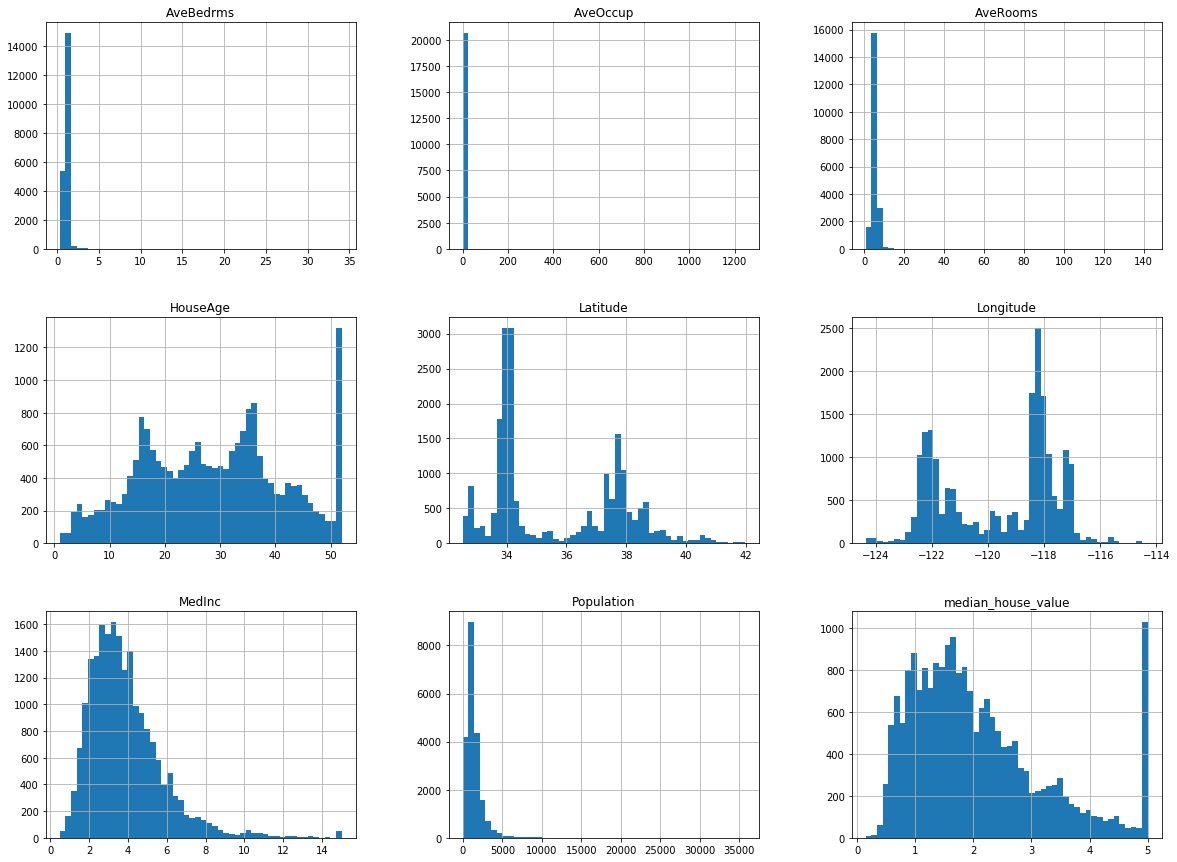

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Splitting the data into train and test set

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
df["income_category"] = pd.cut(df["MedInc"], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

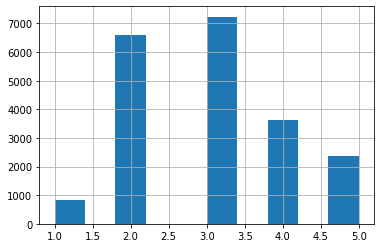

In [13]:
df['income_category'].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [16]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_category", axis=1, inplace=True)

# dropped

In [17]:
housing = strat_train_set.copy()

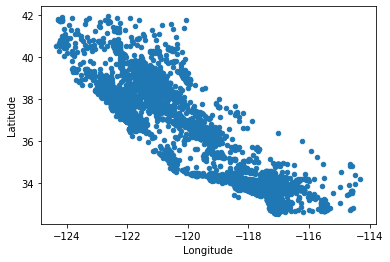

In [18]:
housing.plot(kind="scatter", x="Longitude", y="Latitude")

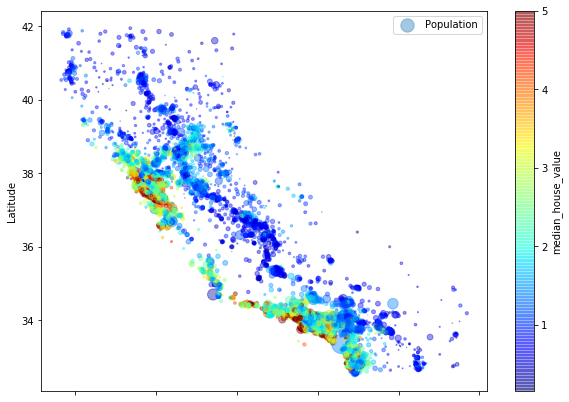

In [19]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, s=housing["Population"]/100, label="Population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()


In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
MedInc                0.687160
AveRooms              0.146285
HouseAge              0.114110
AveOccup             -0.021985
Population           -0.026920
AveBedrms            -0.043289
Longitude            -0.047432
Latitude             -0.142724
Name: median_house_value, dtype: float64

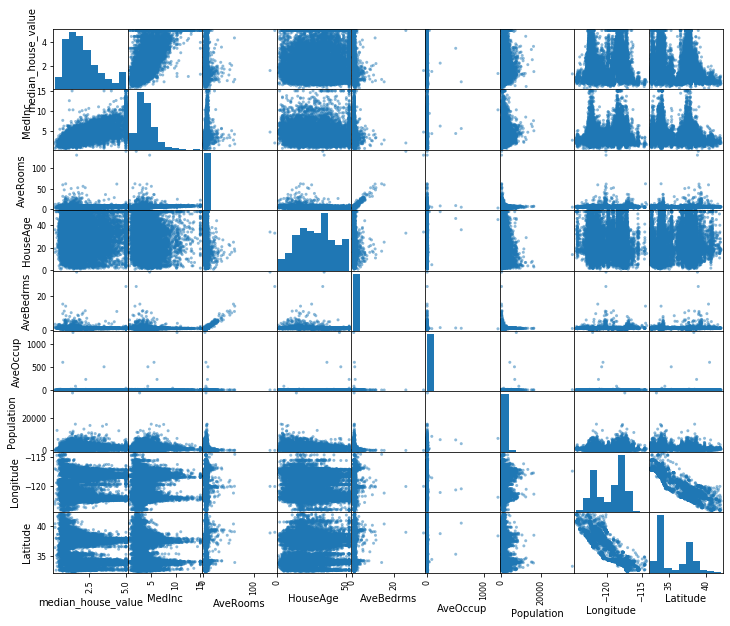

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "MedInc", "AveRooms", "HouseAge","AveBedrms","AveOccup", "Population", "Longitude","Latitude"]
scatter_matrix(housing[attributes], figsize=(12,10))
plt.show()

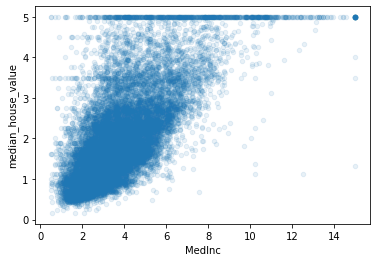

In [24]:
housing.plot(kind="scatter", x="MedInc", y="median_house_value",alpha=0.1)

In [25]:
# Median Income has the highest correlation with the Median housing value which we have to predict.

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
 ])

housing_num_tr = num_pipeline.fit_transform(housing)

In [32]:
housing_prepared = pd.DataFrame(np.array(housing_num_tr),columns=data.feature_names)

In [33]:
housing_prepared

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.614937,0.743331,-0.312055,-0.124305,-0.636211,-0.086499,0.771950,-1.156043
1,1.336459,-1.165317,0.217683,-0.281380,-0.998331,-0.033534,0.659695,-1.176025
2,-0.532046,0.186642,-0.465315,-0.155697,-0.433639,-0.092405,-1.342183,1.186849
3,-1.045566,-0.290520,-0.079661,-0.093552,0.036041,0.089736,0.313576,-0.017068
4,-0.441437,-0.926736,-0.357834,-0.110538,2.724154,-0.004194,-0.659299,0.492474
...,...,...,...,...,...,...,...,...
16507,0.554158,1.379547,0.234352,0.050058,-0.759010,-0.031755,-0.673331,0.722267
16508,-0.948815,0.902385,-0.308114,0.081071,-0.329664,0.084689,-0.823004,1.007011
16509,-0.316705,-1.562952,0.346934,0.081731,0.607904,-0.030554,-0.724781,1.586489
16510,0.098121,0.186642,0.024995,-0.061160,-0.057178,0.061509,-0.851068,0.782213


# Training and Evaluation on train set

## ---------------------------------------------Linear Regression Model----------------------------------------------

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
trial_data = housing.iloc[:5]
trial_labels = housing_labels.iloc[:5]

In [38]:
trial_data_prepared = num_pipeline.transform(trial_data)

In [39]:
print("Predictions: ",lin_reg.predict(trial_data_prepared))
print("Labels: ",list(trial_labels))

Predictions:  [2.0129014  3.32100995 1.91083509 0.89135733 1.81384369]
Labels:  [2.866, 3.406, 1.969, 0.463, 2.545]


In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Lin_rmse: ",lin_rmse)

Lin_rmse:  0.7271432891803268


In [45]:
# Linear regression model is underfitting the training data

## ---------------------------------------------Decision tree model----------------------------------------------------

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
tree_housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Tree_rmse: ",tree_rmse)

Tree_rmse:  2.1440488256908106e-07


In [46]:
# Decision tree model overfits the trainig data

## --------------------------------cross_validation_for_decision_tree-----------------------------------

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Std_deviation: ", scores.std())
    
display_scores(tree_rmse_score)

Scores:  [0.69382109 0.70712382 0.73629454 0.72589991 0.70278753 0.72707787
 0.74931182 0.71548116 0.71545896 0.74672312]
Mean:  0.7219979814969725
Std_deviation:  0.0175278286678589


## -------------------------------------cross_validation_for_linear_reg_model-------------------------------------

In [50]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [0.7036911  0.72431503 0.72680092 0.73050519 0.75637811 0.74775988
 0.68872509 0.73301589 0.76535004 0.72080567]
Mean:  0.7297346932386132
Std_deviation:  0.021891450608441606


In [51]:
#----------------------------Decision trees perform better than linear regression model----------------------------------

## ---------------------------------------------Random Forests model-----------------------------------------------------

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
rf_predictions = forest_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest rmse: ",rf_rmse)

Random Forest rmse:  0.19118722705716445


## ----------------------------------cross_validation_for_random_forest_model-----------------------------------

In [55]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores:  [0.50216028 0.47996093 0.49893682 0.53411341 0.49167042 0.54031533
 0.49009176 0.49166985 0.54596421 0.51786208]
Mean:  0.5092745083242706
Std_deviation:  0.022371758839241886


## Using Grid Search to fine-tune our model

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [58]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
cv_res = grid_search.cv_results_

In [61]:
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score),params)

0.6271385524494775 {'max_features': 2, 'n_estimators': 3}
0.5342559469534502 {'max_features': 2, 'n_estimators': 10}
0.5061636314346672 {'max_features': 2, 'n_estimators': 30}
0.5996549715456924 {'max_features': 4, 'n_estimators': 3}
0.5333153707326854 {'max_features': 4, 'n_estimators': 10}
0.5108894662259906 {'max_features': 4, 'n_estimators': 30}
0.6003571771029179 {'max_features': 6, 'n_estimators': 3}
0.5371911688352913 {'max_features': 6, 'n_estimators': 10}
0.5157560731594655 {'max_features': 6, 'n_estimators': 30}
0.6042046124591811 {'max_features': 8, 'n_estimators': 3}
0.5381299016251695 {'max_features': 8, 'n_estimators': 10}
0.5185136204612637 {'max_features': 8, 'n_estimators': 30}
0.5876506605260066 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5215334962885043 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5900712676089693 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5234105011506466 {'bootstrap': False, 'max_features': 3, 'n

In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [63]:
feature_importances

array([0.33412018, 0.05613551, 0.11949096, 0.04667924, 0.03736323,
       0.11810251, 0.14393347, 0.14417491])

In [64]:
sorted(zip(feature_importances, data.feature_names), reverse=True)

[(0.33412017760722995, 'MedInc'),
 (0.14417491092172716, 'Longitude'),
 (0.143933467585318, 'Latitude'),
 (0.11949095578822387, 'AveRooms'),
 (0.11810250550318484, 'AveOccup'),
 (0.05613551382124526, 'HouseAge'),
 (0.046679238945531346, 'AveBedrms'),
 (0.03736322982753956, 'Population')]

In [65]:
#Another Method
feature_labels = data.feature_names
feature_indexes_by_importance = feature_importances.argsort()
count = 1

print("Increasing order of importances: \n")
for index in feature_indexes_by_importance:
    print('('+str(count)+') '+'{}-{:.4f}%'.format(feature_labels[index], (feature_importances[index] *100.0)))
    count+=1


Increasing order of importances: 

(1) Population-3.7363%
(2) AveBedrms-4.6679%
(3) HouseAge-5.6136%
(4) AveOccup-11.8103%
(5) AveRooms-11.9491%
(6) Latitude-14.3933%
(7) Longitude-14.4175%
(8) MedInc-33.4120%


## Saving our final model for future predictions

In [66]:
import joblib

In [67]:
final_model = grid_search.best_estimator_

In [68]:
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

## Evaluation on Test Set

In [69]:
# loading saved model
final_model = joblib.load("final_model.pkl")

In [70]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [71]:
X_test_prepared = num_pipeline.transform(X_test)

In [72]:
final_predictions = final_model.predict(X_test_prepared)

In [73]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final rmse: ",final_rmse)

Final rmse:  0.4852541935953959


In [74]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([0.46503993, 0.50465942])

## Median house value prediction on few test data

In [75]:
final_model.predict([X_test_prepared[43]])

array([3.34943367])

In [76]:
final_model.predict([X_test_prepared[323]])

array([1.5278])

In [77]:
final_model.predict([X_test_prepared[202]])

array([2.481])